## P4DS Summative Assignment 2

# Data Analysis Project


# Clustering based on customers' characteristics


#### Student ID: 201991880


# Project Plan

## The Data (15 marks)

The data evaluated in this project represents the customers, their consumer behaviour, activity, and influence on the marketing campaign. There is no information about the period from which the data was taken, as well as where the data was collected. The data was originally collected to build a response model that can boost the efficiency of marketing campaigns. It includes their demographics and their spending behaviours, such as amount spent on some of the product categories such as wine, sweets, fish, fruits, meat, and gold products in the last two years. It also contains the number of visits to the website, purchases made through the website, purchases made directly in the store, purchases made with discounts, and purchases made using a catalogue, and time since the last purchase. Besides consumer behaviour, it also contains information about responses to five campaigns and the response to the last campaign. The data also contains information about the cost to contact a customer and the revenue after a client accepted the campaign.

The data consists of 2,240 rows, where each row represents one customer, and 29 columns that are provided in a CSV format. The columns are separated by the `;` character.

25 out of 29 columns are numeric, and the remaining four columns: customer id, education, marital status, and the date of the customer's enrolment with the company are non-numeric, including text and date. The columns do not contain missing fields. However, some values are 'NaN', which will require applying some cleaning. Also, the ranges of values differ between columns, and some columns contain binary fields.

The data was taken from publicly available repository of data - Kaggle and can be found under [this link](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data). All the customers are annonymised and their names are not provided.


## Project Aim and Objectives (5 marks)

The aim of this project is to discover groupings of customers, based on their demographics and purchasing behaviour, without knowing the segments beforehand. The resulting groups can allow for the creation of personas and targeted marketing campaigns that are more cost-effective. Based on such groupings, it is also possible to determine customers that are loyal or at-risk and prepare them offers that will be more engaging. To achieve this, the K-Means clustering algorithm, which is a part of unsupervised machine learning methods, will be applied to the dataset. More specifically, the K-Means algorithm will be applied twice to the already processed and selected features: firstly to create customer segments based on their demographics, and secondly to cluster customers based on their spending behaviour.

### Specific Objective(s)

* __Objective 1:__ Create segments of customer based on their purchaising behaviour by using K-Means algorithm.
* __Objective 2:__ Create segments of customers based on their demographics behaviour by using K-Means algorithm.

## System Design (5 marks)

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
In addition, you should include a diagram and a 100-150 words of explanation to present your architecture._

To achieve mentioned objectives the code will be structured in a pipeline with following parts:

1. Data loading function that will load the data set from a CSV file into a pandas DataFrame.
2. Feature engineering step that will create two new Data Frames, one for performing customer segmentation based on their demographics, and another for performing customer segmentation based on their value. The new data frames will be created by combining some of the columns together and removing columns that will not be used for the particular clustering.
3. Data cleaning step that will remove NaN values, encode text features and standardise numerical features, which will improve the outcome of the clustering.
4. Clustering step for customer segmentation based on their demographics.
5. Clustering step for customer segmentation based on their purchase history.
6. Analysis step to uncover the meaning of the clusters.
  
### Processing Modules and Algorithms

For the purpose of this project the following modules and algorithms will be used:

* The **K-Means** algorithm to perform clustering of customers based on their demograhpics and purchasing behaviour. The K-Means is unsupervised machine learning algorithm that partitions dataset into K distinct non-overlapping subgroups based on the properties of the data points. The scikit-learn package will be used to run the K-Means algorithm.
* The **One-Hot** Encoding technique. This will allow to encode the data in text columns such as martial status and education.
* The standardisation - **Z-Score Scaling** method. Since the K-Means algorithm is a distance-based algorithm, it is necessary that each data should come in a similar scale. That is the purpose of the Z-Score Scaling method, which substracts the mean from a data point and then divides the result by a standard deviation. The mentioned method is widely used especially when there are outliers.
* The Feature Engineering that will build Frequency column by applying sum of one of the purchases made in the web site and in the store.
* **Elbow Method** to find the best number of clusters for two clustering problems.

# Program Code (25 marks)

### Step 1: Loading data from the CSV file into a DataFrame

The first step of the pipeline is to load the data from the CSV file into a DataFrame. To achieve that a pandas function `read_csv()` will be used, that accepts path to the file. Therefore the Pandas module needs to be imported as well. It is also worth to mention that because the CSV file contains data separated by the `;`, it is necessary to provide the separator parameter to the `read_csv()` function.

In [239]:
import pandas as pd

customers_data_raw = pd.read_csv('./marketing_campaign.csv', sep=";")

customers_data_raw.info()

customers_data_raw.head(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


#### Output

Based on the output of the `info()` function, we can observe that all columns have a value for each row, because all the columns are `non-null`. There are three columns of type of `Object` that implies non numerical values. There is also one column that is of type `float64`

### Step 2: Feature Engineering

In order to perform Behavioral segmentation and Demographic segmentation, it will be necessary to select only subsets of features for each of the segmentation task. To do so the loaded data will be used to create two separate Data Frames with only selected subset of features.

#### Step 2.1: Cleaning the data containing NaN values

Because K-Means algorithm requires all data used to be values that are not NaN, it is necessary to clean the data properly. For the purpose of this project the rows that contain NaN fields will be simply removed. To achieve that `dropna()` function will be used. The following function will be used for each data frame separately

In [240]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
  df = df.dropna()
  return df

In [241]:
customers_data_cleaned = clean_data(customers_data_raw)
customers_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

##### Output

It turned out that there were 24 rows that were containing NaN values

#### Step 2.2: Constructing features for Behavioural Segmentation

To perform Behavioural segmentation, more specifically RFM analysis three features are needed:
- recency - days since last purchase. This information is already available in the `Recency` column.
- Frequency - Total number of transactions. This information can be derived by summing values from both store (`NumWebPurchases`) and web (`NumWebPurchases`) purchases.
- Monetary Value - Total amount spent. This information can be derived by summing vlaues of columns representing amount spent of specific products such as `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`

Thus, new pandas Data Frame will be created based on the above columns.

In [242]:
customers_behaviour_df = pd.DataFrame()

customers_behaviour_df['Recency'] = customers_data_cleaned['Recency']
customers_behaviour_df['Frequency'] = customers_data_cleaned['NumStorePurchases'] + customers_data_cleaned['NumWebPurchases']
customers_behaviour_df["MonetaryValue"] = customers_data_cleaned['MntWines'] + customers_data_cleaned['MntFruits'] + customers_data_cleaned['MntMeatProducts'] + customers_data_cleaned['MntFishProducts'] + customers_data_cleaned['MntSweetProducts'] + customers_data_cleaned['MntGoldProds']

customers_behaviour_df.info()

customers_behaviour_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        2216 non-null   int64
 1   Frequency      2216 non-null   int64
 2   MonetaryValue  2216 non-null   int64
dtypes: int64(3)
memory usage: 69.2 KB


,Recency,Frequency,MonetaryValue
count,2216.000000,2216.000000,2216.000000
mean,49.012635,9.886282,607.075361
std,28.948352,5.223032,602.900476
min,0.000000,0.000000,5.000000
25%,24.000000,5.000000,69.000000
50%,49.000000,10.000000,396.500000
75%,74.000000,14.000000,1048.000000
max,99.000000,27.000000,2525.000000


##### Output

The operations above resulted in a new Data Frame that contains three columns - `Recency`, `Frequency`, and `MonetaryValue`. 

After running `describe()` we can observe that the standard deviation of values from the MonetaryValue column is much bigger than for the others, and the minimum amount of spend is just 5 whereas the maximum amount of spend is 2525. This may suggest that the data contains the outliers.

#### Step 2.3: Constructing features for Demographic Segmentation

To perform Demographic Segmentation the following properties will be used:
- `YearOfBirth` - Year of birth of each customer. This information is available in the `Year_Birth` column.
- `Education` - Customer's level of education. This information is available in the `Education` column and it contains text data.
- `MartialStatus` - Customer's martial status. This information is available in the `Martial_Status` column and it contains text data.
- `Income` - The annual household income. This information is available in the `Income` column.
- `Kidhome` - The number of small children in customer's household. This information is available in the `Kidhome` column.
- `Teenhome` - The number of teenagers in customer's houehold. This information is available in the `Teenhome` column.

Thus, new pandas Data Frame will be created based on the above columns.

In [243]:
customers_demographics_df = pd.DataFrame()

customers_demographics_df['YearOfBirth'] = customers_data_cleaned['Year_Birth']
customers_demographics_df['Education'] = customers_data_cleaned['Education']
customers_demographics_df['MartialStatus'] = customers_data_cleaned['Marital_Status']
customers_demographics_df['Income'] = customers_data_cleaned['Income']
customers_demographics_df['Kidhome'] = customers_data_cleaned['Kidhome']
customers_demographics_df['Teenhome'] = customers_data_cleaned['Teenhome']

customers_demographics_df.info()
customers_demographics_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearOfBirth    2216 non-null   int64  
 1   Education      2216 non-null   object 
 2   MartialStatus  2216 non-null   object 
 3   Income         2216 non-null   float64
 4   Kidhome        2216 non-null   int64  
 5   Teenhome       2216 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 121.2+ KB


,YearOfBirth,Income,Kidhome,Teenhome
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415
std,11.985554,25173.076661,0.536896,0.544181
min,1893.000000,1730.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000


##### Output

The newly created Data Frame contains both numerical and text data. By analysing basic statistics of the data, we can observe that the there is a huge gap between the lowest and the highest income.


#### Step 2.4: Applying categorical encoding

Given that certain features are represented by text and K-Means algorithm only works on numerical data, it is necessary to convert text values into a numerical format. There are two columns containing text values - `Education` and `MartialStatus` where each contains between 2 and 10 different categories. To convert these values to numerical format, a technique called One-Hot Encoding will be used. As a result, there will be new columns, each representing one category from the original column. One will represent the presence of certain category whereas zeros will mark that customer does not have assigned certain category.

In [244]:
def encode_text_columns(df: pd.DataFrame) -> pd:
  return pd.get_dummies(df, dtype=float)

In [245]:
customers_demographics_df = encode_text_columns(customers_demographics_df)
customers_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearOfBirth             2216 non-null   int64  
 1   Income                  2216 non-null   float64
 2   Kidhome                 2216 non-null   int64  
 3   Teenhome                2216 non-null   int64  
 4   Education_2n Cycle      2216 non-null   float64
 5   Education_Basic         2216 non-null   float64
 6   Education_Graduation    2216 non-null   float64
 7   Education_Master        2216 non-null   float64
 8   Education_PhD           2216 non-null   float64
 9   MartialStatus_Absurd    2216 non-null   float64
 10  MartialStatus_Alone     2216 non-null   float64
 11  MartialStatus_Divorced  2216 non-null   float64
 12  MartialStatus_Married   2216 non-null   float64
 13  MartialStatus_Single    2216 non-null   float64
 14  MartialStatus_Together  2216 non-null   float

After encoding of the text values we can see now that the number of columns increased to 17 and newly created columns now represent each category from the original columns.

#### Step 2.5: Applying Standarisation on the data for Behavioural Segmentation

After constructing data frames that will be used for the segmentation purposes it is necessary to apply standarisation on the numerical data, before performing segmentation. The `Z-Score Scaling` will be used to apply standarisation and scale data to the values from range between 0 and 1. The `Z-Score Scaling` can be achieved by substracting mean from the original data and then dividing the substraction by the standard deviation of the data.

In [246]:
def standardise_data(df: pd.DataFrame):
  df = (df - df.mean()) / df.std()
  return df


In [247]:
scaled_customers_behaviour_df = standardise_data(customers_behaviour_df)

print(scaled_customers_behaviour_df.mean(axis=0))
print(scaled_customers_behaviour_df.std(axis=0))

Recency         -4.809630e-18
Frequency       -3.847704e-17
MonetaryValue    1.603210e-17
dtype: float64
Recency          1.0
Frequency        1.0
MonetaryValue    1.0
dtype: float64


In [198]:
scaled_customers_demographics_df = standardise_data(customers_demographics_df)

print(scaled_customers_demographics_df.mean(axis=0))
print(scaled_customers_demographics_df.std(axis=0))


YearOfBirth               6.430476e-15
Income                    4.969951e-17
Kidhome                  -6.252520e-17
Teenhome                  3.847704e-17
Education_2n Cycle       -3.927865e-17
Education_Basic           1.603210e-17
Education_Graduation     -8.977977e-17
Education_Master         -2.324655e-17
Education_PhD            -6.733483e-17
MartialStatus_Absurd     -1.282568e-17
MartialStatus_Alone       0.000000e+00
MartialStatus_Divorced   -7.374767e-17
MartialStatus_Married     1.603210e-17
MartialStatus_Single      5.450914e-17
MartialStatus_Together    1.523050e-17
MartialStatus_Widow      -3.847704e-17
MartialStatus_YOLO       -2.565136e-17
dtype: float64
YearOfBirth               1.0
Income                    1.0
Kidhome                   1.0
Teenhome                  1.0
Education_2n Cycle        1.0
Education_Basic           1.0
Education_Graduation      1.0
Education_Master          1.0
Education_PhD             1.0
MartialStatus_Absurd      1.0
MartialStatus_Alone   

##### Output

After standardising data we can observe that now the mean is approximated to 0 and the standard deviation is 1. Such data can be used now to perform segmentation

### Step 3: Using K-Means Algorithm on data

#### Step 3.1: Finding the number of clusters for Behavioural Clustering

To apply K-Means algorithm and cluster data into groups, it is necessary to select number of clusters first. Because it is not known yet how many clusters should be, an elbow method will be used to determine the generally good number of clusters. To do so, K-Means algorithm will be applied to the data iteratively starting by using 2 clusters up to using 10 clusters.

In [248]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def k_means(df: pd.DataFrame, n_clusters: int):
  X = df.values
  ks = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
  ks.fit(X)
  
  return ks

def find_k(df: pd.DataFrame):
  wcss = []
  for k in range(2, 11):
    ks = k_means(df, k)
    wcss.append(ks.inertia_)

  plt.figure(figsize=(10, 6))
  plt.plot(range(2, 11), wcss, marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('WCSS')
  plt.grid(True)
  plt.show()


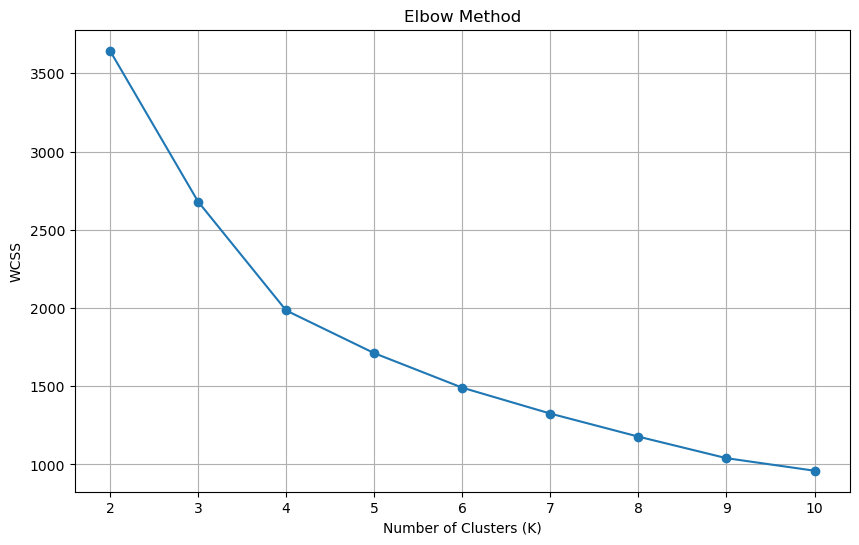

In [249]:
find_k(scaled_customers_behaviour_df)

##### Output

Based on the graph we can observe that the WCSS starts to decrease slower from K = 4. This suggests that number 4 is a good candidate for the number of clusters that the data should be groupped into.

#### Step 3.2 Applying K-Means clustering algorithm to the data for Behavioural Clustering

Since the number of clusters is choosen. It is now possible to apply K-Means algorithm to cluster data into 4 subgroups. The following cell will use already created k_means function. After deriving customer clusters they will be assigned to the data frame used to calculate them, under a new column `BehaviourCluster`.

In [250]:
clustered_customers_by_behaviour = k_means(scaled_customers_behaviour_df, 4)
customers_behaviour_df['BehaviourCluster'] = clustered_customers_by_behaviour.labels_

customers_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Recency           2216 non-null   int64
 1   Frequency         2216 non-null   int64
 2   MonetaryValue     2216 non-null   int64
 3   BehaviourCluster  2216 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 77.9 KB


##### Output:

As a result, we can see that there is a new column added to the data frame that represents clusters for each customer. The clusters are represented by numerical values between 0 and 3 inclusive.

#### Step 3.3 Evaluating the clusters from behavioural Clustering

The Customer Behaviour Clusters are only useful, especially for the marketing team as along as they carry a meaningful names. Therefore, the following code cell will explore the meaning of the clusters.

In [251]:
customer_profiles = customers_behaviour_df.groupby('BehaviourCluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()
customer_profiles = customer_profiles.sort_values(by='MonetaryValue', ascending=False)

print(customer_profiles)

                    Recency  Frequency  MonetaryValue
BehaviourCluster                                     
2                 72.677419  14.261860    1184.102467
3                 22.505112  14.781186    1115.599182
0                 74.714527   6.109797     152.929054
1                 24.794408   5.833882     140.123355


##### Output

The clusters were grouped by the mean of three columns - Recency, Frequency and MonetaryValue. After evaluating the clusters we can distinguish the following behaviours:
- At-Risk - Customers from the cluster 3 spent a lot of money in a company and they were doing it often but they stopped buying and have not bought products for a long time. Also customers from the cluster 1 can be marked with that behaviour as well. Since they have not spent a lot of money, they were not buing often and they have not bought products since some time.
- Champions - Customers that are spending a lot of money, they are frequent shoppers and they bought a product recently. To this category we can assign customers from a cluster 2.

#### Step 3.4 Finding the number of cluster for Demographic Clustering

To apply K-Means algorithm and cluster data into groups, it is necessary to select number of clusters first. Because it is not known yet how many clusters should be, an elbow method will be used to determine the generally good number of clusters. To do so, K-Means algorithm will be applied to the data iteratively starting by using 2 clusters up to using 10 clusters.

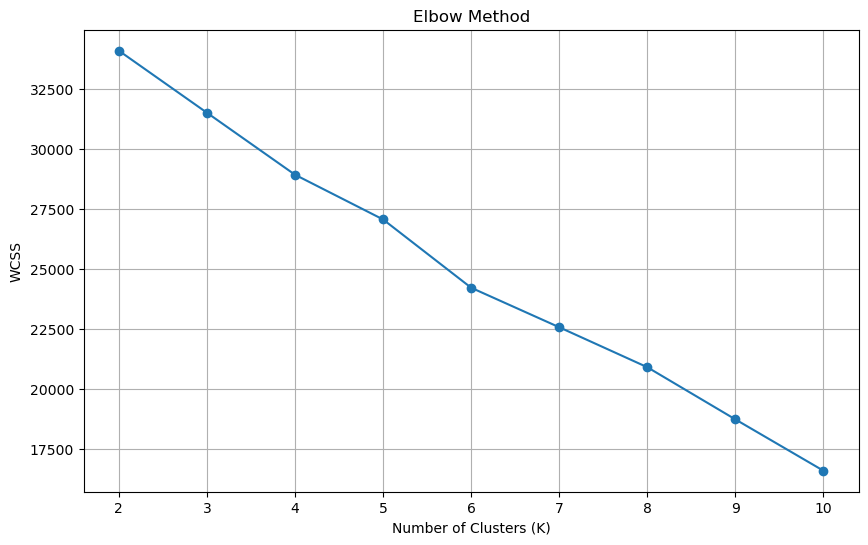

In [252]:
find_k(scaled_customers_demographics_df)

##### Output

Based on the graph we can observe that the WCSS decrease linearly with the increase of the number of clusters. This may indicate that the based on selected features it will be hard to select good value for the number of clusters. However for the purpose of further evaluation, 6 will be choosen as a number of cluster.

#### Step 3.5 Applying K-Means clustering algorithm to the data for Demographics Clustering

Since the number of clusters is choosen. It is now possible to apply K-Means algorithm to cluster data into 6 subgroups. The following cell will use already created k_means function. After deriving customer clusters they will be assigned to the data frame used to calculate them, under a new column `DemographicsCluster`.

In [253]:
import numpy as np

clustered_customers_by_demographics = k_means(scaled_customers_demographics_df, 6)
customers_demographics_df['DemographicsCluster'] = clustered_customers_by_demographics.labels_

customers_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearOfBirth             2216 non-null   int64  
 1   Income                  2216 non-null   float64
 2   Kidhome                 2216 non-null   int64  
 3   Teenhome                2216 non-null   int64  
 4   Education_2n Cycle      2216 non-null   float64
 5   Education_Basic         2216 non-null   float64
 6   Education_Graduation    2216 non-null   float64
 7   Education_Master        2216 non-null   float64
 8   Education_PhD           2216 non-null   float64
 9   MartialStatus_Absurd    2216 non-null   float64
 10  MartialStatus_Alone     2216 non-null   float64
 11  MartialStatus_Divorced  2216 non-null   float64
 12  MartialStatus_Married   2216 non-null   float64
 13  MartialStatus_Single    2216 non-null   float64
 14  MartialStatus_Together  2216 non-null   float

As a result, we can see that there is a new column added to the data frame that represents clusters for each customer. The clusters are represented by numerical values between 0 and 5 inclusive.

#### Step 3.6 Evaluating the clusters from Demographics Clustering

The Customer Demographics Clusters are only useful, especially for the marketing team as along as they carry a meaningful names. Therefore, the following code cell will explore the meaning of clusters.

In [254]:
def first_mode(series: pd.Series):
    modes = series.mode()
    if not modes.empty:
        return modes.iloc[0]
    return np.nan

aggregation_functions = {
    'YearOfBirth': 'mean',
    'Income': 'mean',
    'Kidhome': first_mode,
    'Teenhome': first_mode,
    'Education_2n Cycle': first_mode,
    'Education_Basic': first_mode,
    'Education_Graduation': first_mode,
    'Education_Master': first_mode,
    'Education_PhD': first_mode,
    'MartialStatus_Absurd': first_mode,
    'MartialStatus_Alone': first_mode,
    'MartialStatus_Divorced': first_mode,
    'MartialStatus_Married': first_mode,
    'MartialStatus_Single': first_mode,
    'MartialStatus_Together': first_mode,
    'MartialStatus_Widow': first_mode,
    'MartialStatus_YOLO': first_mode,
}


customer_demographics = (
    customers_demographics_df
    .groupby('DemographicsCluster')
    .agg(aggregation_functions)
)

customer_demographics = customer_demographics.sort_values(by='Income', ascending=False)

print(customer_demographics)

                     YearOfBirth        Income  Kidhome  Teenhome  \
DemographicsCluster                                                 
5                    1975.000000  72365.500000        0         0   
0                    1958.763158  56481.552632        0         1   
3                    1967.774306  53196.281250        0         0   
2                    1966.275862  52834.228448        0         1   
1                    1969.576251  51717.311991        0         0   
4                    1971.571125  50995.350318        0         0   

                     Education_2n Cycle  Education_Basic  \
DemographicsCluster                                        
5                                   0.0              0.0   
0                                   0.0              0.0   
3                                   0.0              0.0   
2                                   0.0              0.0   
1                                   0.0              0.0   
4                          

##### Output

We can observe that 5 clusters where distinquished. However by looking at the average values for each of the column it is hard to interpret the meaning of each cluster due to many features.

# Project Outcome (10 + 10 marks)

## Overview of Results

After applying K-Means clustering on the data to find clusters based on the customers' behaviour and demographics, customers could be grouped into four subgroups based on their behaviour and into 6 groups based on their demographics. The emerged clusters could be further examined and based on them, a marketing strategy can be prepared to target specific subgroups to boost the sales. 

## Objective 1: Clustering based on Customer Behaviour

### Explanation of Results
After applying K-Means Algorithm on the data frame containing Recency, Frequency and Monetary Value, four clusters were determined. Based on mean values for mentioned three features it is possible to distinguish two groups of customers.

**At-Risk customers** - This group represents customers who are more likely to churn as they do not buy as much as they used to. There are two clusters that could be marked as at Risk:
- The third cluster. Customers from this cluster used to spent a lot of money and were frequent buyers but however they have stoped buying and the mean recency is high. Due to their high spending this cluster of customers made on average they should be a priority for the marketing campaing that would encourage them to start buying again.
- The fourth cluster. Customers from this cluster did not spend a lot of money, they were not frequent buyers and they mean recency is high. Such customers can be also incentivised by marketing campaings to start buying again or more.

**Ocassional customers** - This group represents customers that did not spend much and were not frequent buyers, but they mean recency is low. This customers buy products ocassionally rather for small amounts. This group could be targetted by discounting marketing campaigns to encourage them to buy more frequently. Based on the data set there is one such cluster - the first cluster.

**Champions customers** - This group represents customers that are frequent buyers, they spend a lot of money, and their mean recency is low. This customers are the most important for the business and based on the data it is possible to reward them by some special offers, or offer product testing. The second cluster represents Champions within the data set.


### Visualisation

The following bar chart visualises the clusters obtained and their average values in each of the category - Recency, Frequency and Monetary Value. It uses standard matplotlib plotting library.

Text(0, 0.5, 'Avg. Total Spend')

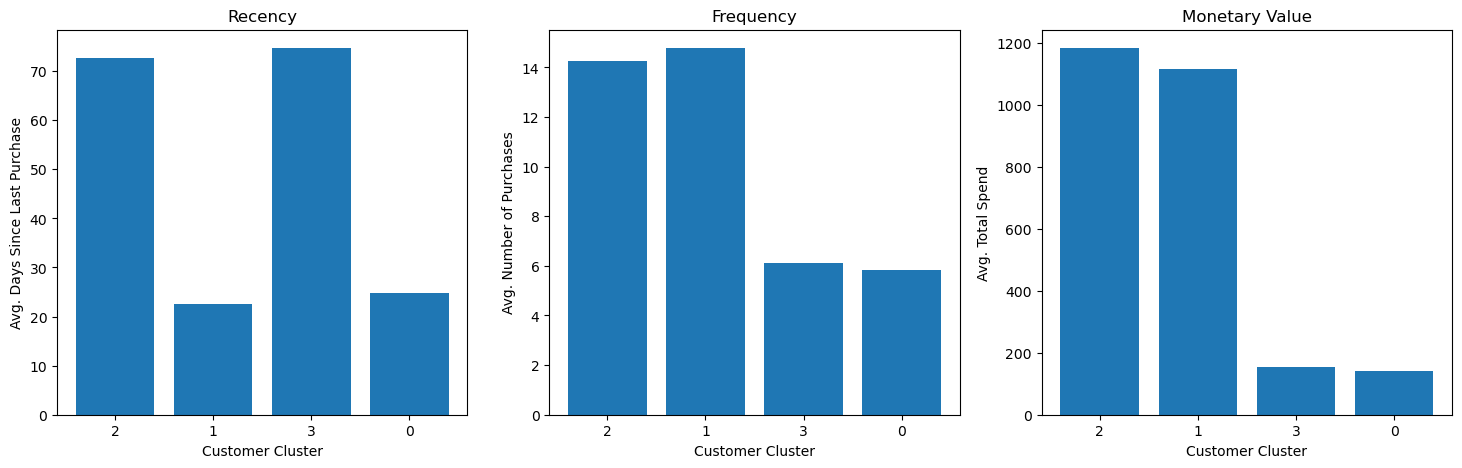

In [255]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

labels = customers_behaviour_df['BehaviourCluster'].unique().astype(str)
x_positions = range(len(labels))

axes[0].bar(x_positions, customer_profiles['Recency'])
axes[0].set_title('Recency')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(labels)
axes[0].set_xlabel('Customer Cluster')
axes[0].set_ylabel('Avg. Days Since Last Purchase')

axes[1].bar(x_positions, customer_profiles['Frequency'])
axes[1].set_title('Frequency')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(labels)
axes[1].set_xlabel('Customer Cluster')
axes[1].set_ylabel('Avg. Number of Purchases')

axes[2].bar(x_positions, customer_profiles['MonetaryValue'])
axes[2].set_title('Monetary Value')
axes[2].set_xticks(x_positions)
axes[2].set_xticklabels(labels)
axes[2].set_xlabel('Customer Cluster')
axes[2].set_ylabel('Avg. Total Spend')


## Objective 2: Clustering based on Customers' Demographics
### Explanation of Results

After applying K-Means algorithm on the data frame containing demographics features, six clusers were established. This time instead of using mean to interpret the data, also mode was used on binary fields. Based on the data visualised below, it is possible to determine the following groups based on the demographics:

**High Income individuals** This group represents high income individuals whose martial status is likely to be unkown. The "Absurd" is the most often occurring one. However, these customers are also the youngest group and statistically do not have children.

**Low Income individuals / Young professionals** This group represents low income customers that are younger than other groups, are mostly single and do not have children but most of them graduated from the University.

**Eldery customers** This group represents customers whose average year of birth is earlier than in the other groups. They usually have children, and most of them are widows.

### Visualisation

The following bar chart visualises the clusters obtained and their average and mode values for each of the category. It uses standard matplotlib plotting library.

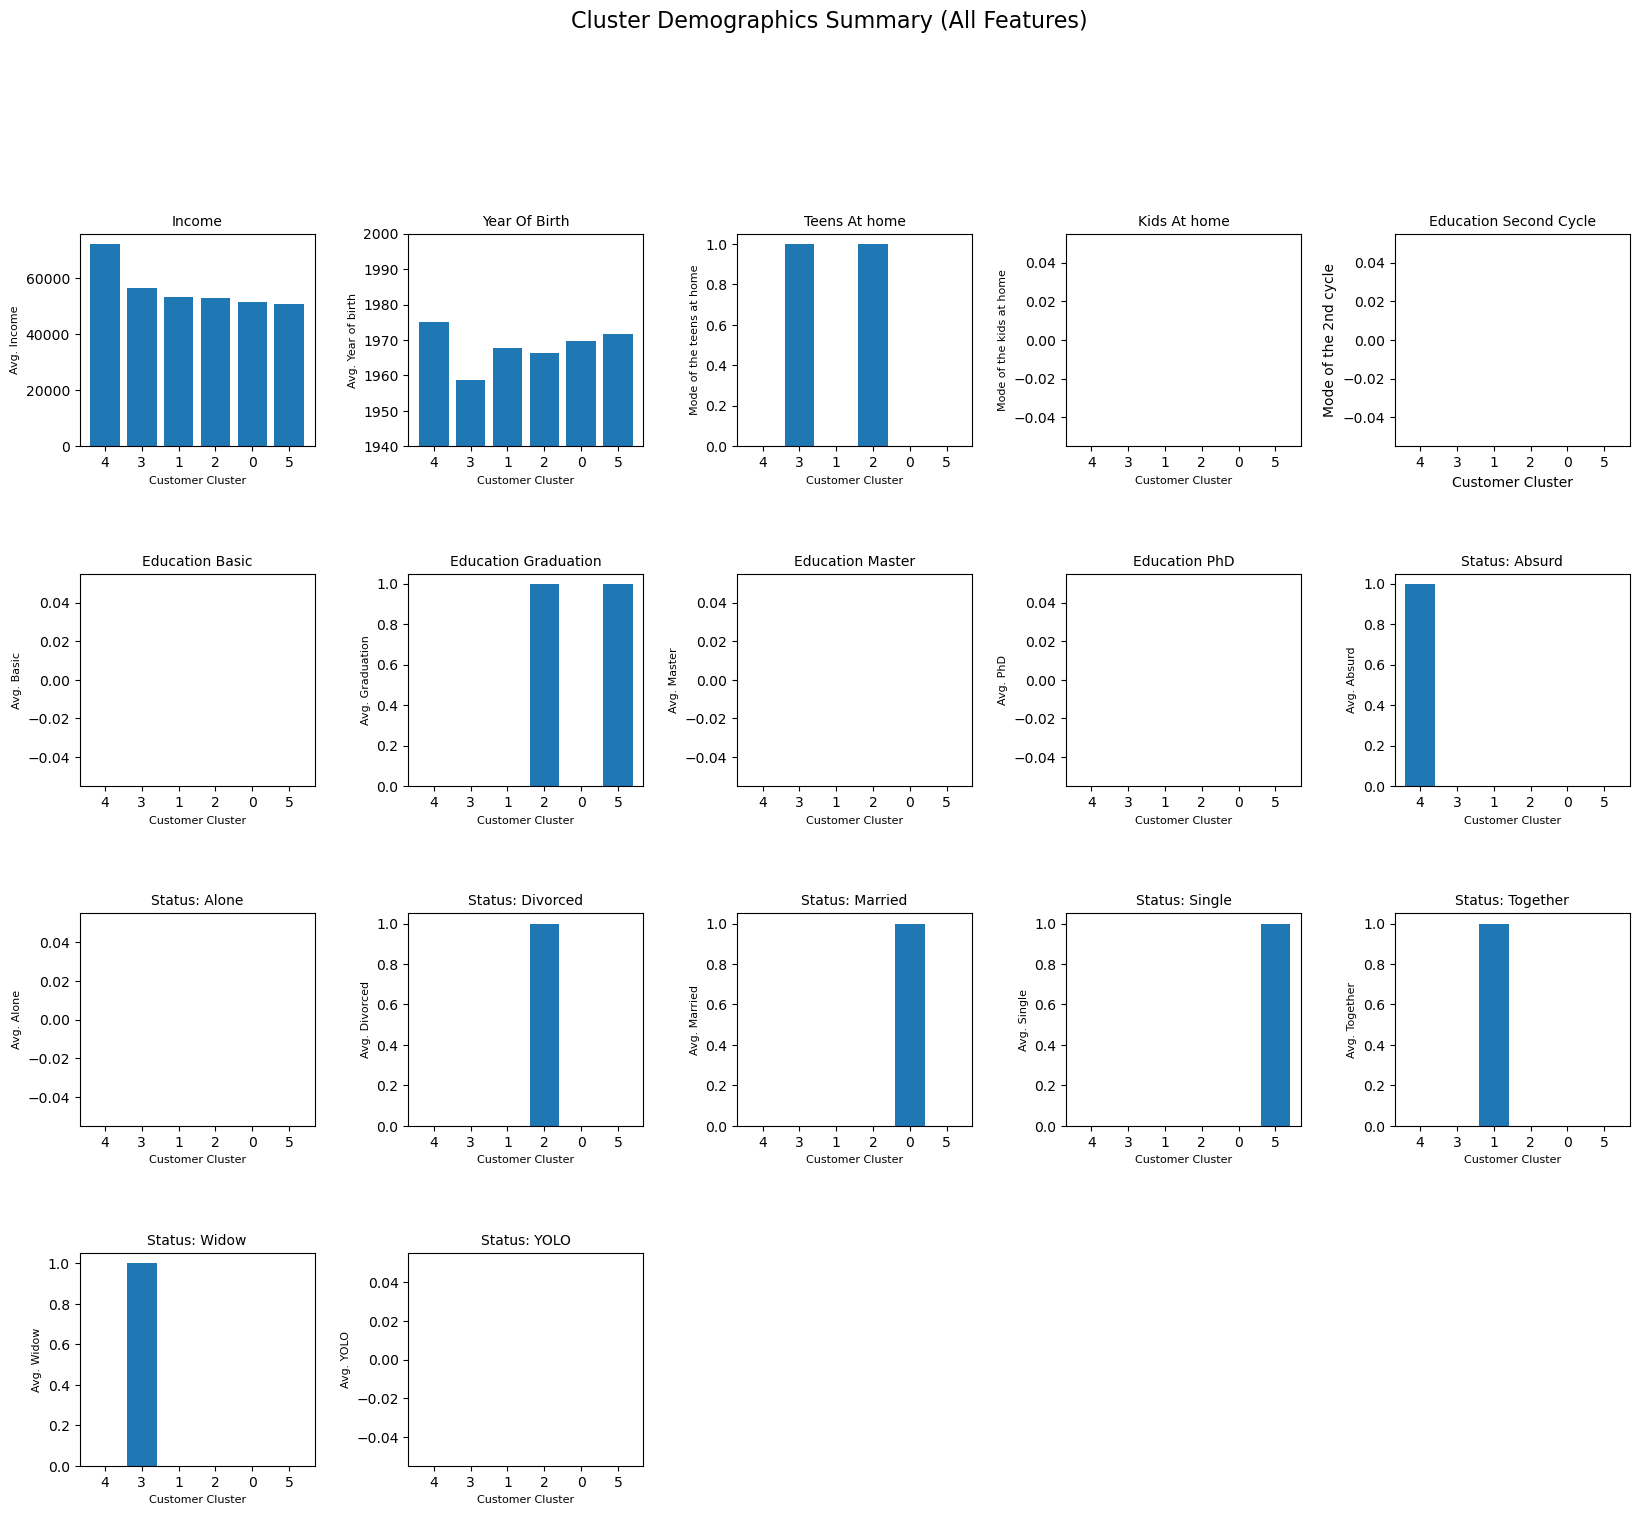

In [238]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
fig.suptitle('Cluster Demographics Summary (All Features)', fontsize=16, y=1.02)

labels = customers_demographics_df['DemographicsCluster'].unique().astype(str)
x_positions = range(len(labels))

axes[0][0].bar(x_positions, customer_demographics['Income'])
axes[0][0].set_title('Income', fontsize=10)
axes[0][0].set_xticks(x_positions)
axes[0][0].set_xticklabels(labels)
axes[0][0].set_xlabel('Customer Cluster', fontsize=8)
axes[0][0].set_ylabel('Avg. Income', fontsize=8)

axes[0][1].bar(x_positions, customer_demographics['YearOfBirth'])
axes[0][1].set_title('Year Of Birth', fontsize=10)
axes[0][1].set_xticks(x_positions)
axes[0][1].set_xticklabels(labels)
axes[0][1].set_ylim(1940, 2000)
axes[0][1].set_xlabel('Customer Cluster', fontsize=8)
axes[0][1].set_ylabel('Avg. Year of birth', fontsize=8)

axes[0][2].bar(x_positions, customer_demographics['Teenhome'])
axes[0][2].set_title('Teens At home', fontsize=10)
axes[0][2].set_xticks(x_positions)
axes[0][2].set_xticklabels(labels)
axes[0][2].set_xlabel('Customer Cluster', fontsize=8)
axes[0][2].set_ylabel('Mode of the teens at home', fontsize=8)

axes[0][3].bar(x_positions, customer_demographics['Kidhome'])
axes[0][3].set_title('Kids At home', fontsize=10)
axes[0][3].set_xticks(x_positions)
axes[0][3].set_xticklabels(labels)
axes[0][3].set_xlabel('Customer Cluster', fontsize=8)
axes[0][3].set_ylabel('Mode of the kids at home', fontsize=8)

axes[0][4].bar(x_positions, customer_demographics['Education_2n Cycle'])
axes[0][4].set_title('Education Second Cycle', fontsize=10)
axes[0][4].set_xticks(x_positions)
axes[0][4].set_xticklabels(labels)
axes[0][4].set_xlabel('Customer Cluster')
axes[0][4].set_ylabel('Mode of the 2nd cycle')

axes[1][0].bar(x_positions, customer_demographics['Education_Basic'])
axes[1][0].set_title('Education Basic', fontsize=10)
axes[1][0].set_xticks(x_positions)
axes[1][0].set_xticklabels(labels)
axes[1][0].set_xlabel('Customer Cluster', fontsize=8)
axes[1][0].set_ylabel('Avg. Basic', fontsize=8)

axes[1][1].bar(x_positions, customer_demographics['Education_Graduation'])
axes[1][1].set_title('Education Graduation', fontsize=10)
axes[1][1].set_xticks(x_positions)
axes[1][1].set_xticklabels(labels)
axes[1][1].set_xlabel('Customer Cluster', fontsize=8)
axes[1][1].set_ylabel('Avg. Graduation', fontsize=8)

axes[1][2].bar(x_positions, customer_demographics['Education_Master'])
axes[1][2].set_title('Education Master', fontsize=10)
axes[1][2].set_xticks(x_positions)
axes[1][2].set_xticklabels(labels)
axes[1][2].set_xlabel('Customer Cluster', fontsize=8)
axes[1][2].set_ylabel('Avg. Master', fontsize=8)

axes[1][3].bar(x_positions, customer_demographics['Education_PhD'])
axes[1][3].set_title('Education PhD', fontsize=10)
axes[1][3].set_xticks(x_positions)
axes[1][3].set_xticklabels(labels)
axes[1][3].set_xlabel('Customer Cluster', fontsize=8)
axes[1][3].set_ylabel('Avg. PhD', fontsize=8)

axes[1][4].bar(x_positions, customer_demographics['MartialStatus_Absurd'])
axes[1][4].set_title('Status: Absurd', fontsize=10)
axes[1][4].set_xticks(x_positions)
axes[1][4].set_xticklabels(labels)
axes[1][4].set_xlabel('Customer Cluster', fontsize=8)
axes[1][4].set_ylabel('Avg. Absurd', fontsize=8)

axes[2][0].bar(x_positions, customer_demographics['MartialStatus_Alone'])
axes[2][0].set_title('Status: Alone', fontsize=10)
axes[2][0].set_xticks(x_positions)
axes[2][0].set_xticklabels(labels)
axes[2][0].set_xlabel('Customer Cluster', fontsize=8)
axes[2][0].set_ylabel('Avg. Alone', fontsize=8)

axes[2][1].bar(x_positions, customer_demographics['MartialStatus_Divorced'])
axes[2][1].set_title('Status: Divorced', fontsize=10)
axes[2][1].set_xticks(x_positions)
axes[2][1].set_xticklabels(labels)
axes[2][1].set_xlabel('Customer Cluster', fontsize=8)
axes[2][1].set_ylabel('Avg. Divorced', fontsize=8)

axes[2][2].bar(x_positions, customer_demographics['MartialStatus_Married'])
axes[2][2].set_title('Status: Married', fontsize=10)
axes[2][2].set_xticks(x_positions)
axes[2][2].set_xticklabels(labels)
axes[2][2].set_xlabel('Customer Cluster', fontsize=8)
axes[2][2].set_ylabel('Avg. Married', fontsize=8)

axes[2][3].bar(x_positions, customer_demographics['MartialStatus_Single'])
axes[2][3].set_title('Status: Single', fontsize=10)
axes[2][3].set_xticks(x_positions)
axes[2][3].set_xticklabels(labels)
axes[2][3].set_xlabel('Customer Cluster', fontsize=8)
axes[2][3].set_ylabel('Avg. Single', fontsize=8)

axes[2][4].bar(x_positions, customer_demographics['MartialStatus_Together'])
axes[2][4].set_title('Status: Together', fontsize=10)
axes[2][4].set_xticks(x_positions)
axes[2][4].set_xticklabels(labels)
axes[2][4].set_xlabel('Customer Cluster', fontsize=8)
axes[2][4].set_ylabel('Avg. Together', fontsize=8)

axes[3][0].bar(x_positions, customer_demographics['MartialStatus_Widow'])
axes[3][0].set_title('Status: Widow', fontsize=10)
axes[3][0].set_xticks(x_positions)
axes[3][0].set_xticklabels(labels)
axes[3][0].set_xlabel('Customer Cluster', fontsize=8)
axes[3][0].set_ylabel('Avg. Widow', fontsize=8)

axes[3][1].bar(x_positions, customer_demographics['MartialStatus_YOLO'])
axes[3][1].set_title('Status: YOLO', fontsize=10)
axes[3][1].set_xticks(x_positions)
axes[3][1].set_xticklabels(labels)
axes[3][1].set_xlabel('Customer Cluster', fontsize=8)
axes[3][1].set_ylabel('Avg. YOLO', fontsize=8)

fig.delaxes(axes[3][2])
fig.delaxes(axes[3][3])
fig.delaxes(axes[3][4])

# Conclusion and presentation (10 marks)

### Achievements

After applying the K-Means algorithm, I was able to obtain the customer segments based on two characteristics — customers' purchasing behaviour and demographics. I could distinguish four clusters based on purchasing behaviour and six clusters based on demographics. After interpreting the clusters, I discovered crucial indicators that can potentially drive marketing campaigns that are better targeted at the groups of customers. One of the interesting and crucial findings from the segmentation based on customers' purchasing behaviour is that customers who were the most frequent buyers and were spending the most money have stopped buying. This is a big risk, and actions should be taken toward reducing the risk of losing them. Another interesting finding is that the customers with the highest income are the youngest on average, which may be the opposite of the expectations. That finding can help adjust marketing campaigns by using different means of communication, such as social media rather than newspapers.

### Limitations

The project was limited to a relatively small number of customers, which may limit the discoveries. Furthermore, not all available features describing customers were used. Using them could change the output of the K-Means algorithm or discover new customer clusters.

### Future Work

In the future, I would re-evaluate the feature engineering section to enhance the segmentation based on customers' behaviour by adding more features available in the dataset. Moreover, I would refine the features used to segment customers based on their demographics. For example, instead of using two columns for teens and kids separately, they could be combined into a column representing the total number of children. Similarly, information about education could be transformed into groups such as higher education completed / not completed.

### Video Presentation
Video presentation is provided in a separate file.